In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
state = 'NJ'
nj_excel = pd.read_excel(r"C:\Users\david\OneDrive\Documents\GitHub\SPEOC-pt-1\Data\Post1790\NJ\NJ_3_percent_stock_T698_R1_R2.xlsx",
                             header=11, usecols='G, L, M') 
nj_excel['Cents'] = nj_excel['Cents'].div(100)
nj_excel = nj_excel.rename(columns={'Unnamed: 6':'Occupation'})
print(nj_excel)

                  Occupation  Dollars  Cents
0               Schoolmaster    162.0   0.51
1                  Carpinter     41.0   0.10
2                        NaN     70.0   0.44
3                    Esquire    684.0   0.07
4                        NaN     92.0   0.42
..                       ...      ...    ...
971                    Tamer    430.0   0.38
972                      NaN     47.0   0.35
973                      NaN     19.0   0.44
974                      NaN      9.0   0.62
975  Executor Rebecca Forman    165.0   0.84

[976 rows x 3 columns]


In [11]:
def get_debt_no_job(occupations):
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    no_occ_copy = no_occ.copy() #avoid settingcopywarning warning
    total = no_occ_copy[['Dollars', 'Cents']].sum(axis=1) #find total with dollar and cents separate columns    

    return total.to_frame(name='totals') #convert to more usable dataframe format

def get_debt_w_job(occupations):
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    occ_copy = occ.copy() #avoid settingcopywarning warning
    total = occ_copy[['Dollars', 'Cents']].sum(axis=1) #find total with dollar and cents separate columns       
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 

def plot(excel):
    no_occ = get_debt_no_job(excel)['totals'].reset_index(drop=True) #get dataframe for people with no occupation listed  
    occ = get_debt_w_job(excel)['totals.2'].reset_index(drop=True) #get dataframe for people with an occupation listed
    
    NoOccExcel = pd.read_excel('NoOccupation.xlsx')
    OccExcel = pd.read_excel('Occupation.xlsx')
    
    ConcatDfNoOcc = pd.concat([NoOccExcel, no_occ], ignore_index=True, axis=1)
    ConcatDfOcc = pd.concat([OccExcel, occ], ignore_index=True, axis=1)
    
    ConcatDfNoOcc.to_excel('NoOccupation.xlsx', index=False)
    ConcatDfOcc.to_excel('Occupation.xlsx', index=False)
    
    plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', weights=np.ones_like(no_occ) / len(no_occ)) #plot
    plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(occ) / len(occ)) #plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")"
    plt.title(title) #add title
    plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
    plt.ylabel("Frequency") #add y title
    plt.legend() #add legend

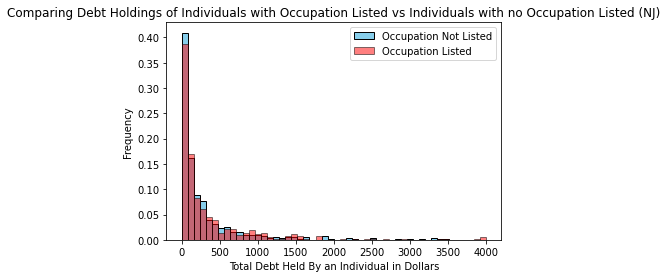

In [12]:
plot(nj_excel)